In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import os

#datadir = os.path.join("/media", "disk-1")
datadir = os.path.join("..", "..", "..", "..", "Data")

In [3]:
frame = gpd.GeoDataFrame.from_file(os.path.join(datadir, "Dallas_City Service Areas"))
frame

,area_num,coor_name,division,email,geometry,phone
0,1,Joe Ya?ez,CENTRAL,central.coordinator@dallascityhall.com,POLYGON ((-96.77039803138386 32.84469787640985...,214-671-8873
1,6,Merry Vickers,NORTH CENTRAL,northcentral.coordinator@dallascityhall.com,POLYGON ((-96.81855188816667 33.01282743149741...,214-671-8058
2,2,Merry Vickers,NORTHEAST,northeast.coordinator@dallascityhall.com,(POLYGON ((-96.75257840365255 32.9347587721087...,214-671-8058
3,5,Joe Ya?ez,NORTHWEST,northwest.coordinator@dallascityhall.com,(POLYGON ((-96.92824909437518 32.8954299247484...,214-671-8873
4,7,Kevin Acosta,SOUTH CENTRAL,southcentral.coordinator@dallascityhall.com,POLYGON ((-96.80400729446404 32.76307139871697...,214-671-8874
5,3,Corey Morgan,SOUTHEAST,southeast.coordinator@dallascityhall.com,POLYGON ((-96.68257924899638 32.79732264991524...,214-671-8913
6,4,Kevin Acosta,SOUTHWEST,southwest.coordinator@dallascityhall.com,POLYGON ((-96.85605907643301 32.79807757822954...,214-671-8874


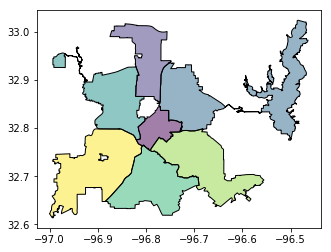

In [4]:
frame.plot()

In [5]:
e = 0.00002
geo = []
for i, row in frame.iterrows():
    p = row.geometry
    try:
        p = list(p)[0]
    except:
        pass
    p = p.buffer(-e)
    try:
        p = list(p)[0]
    except:
        pass
    p = p.buffer(e)
    geo.append(p)

In [6]:
out = gpd.GeoDataFrame({
    "name" : frame["division"],
    })
out.geometry = geo
out.crs = frame.crs
out

,name,geometry
0,CENTRAL,POLYGON ((-96.81768385247221 32.77020690517413...
1,NORTH CENTRAL,POLYGON ((-96.87159844567368 33.00043861560013...
2,NORTHEAST,POLYGON ((-96.77207798575644 32.84564105425981...
3,NORTHWEST,"POLYGON ((-96.93057971094913 32.8740496503761,..."
4,SOUTH CENTRAL,POLYGON ((-96.87991139398673 32.64742244552625...
5,SOUTHEAST,POLYGON ((-96.78291478078475 32.75221427809837...
6,SOUTHWEST,POLYGON ((-97.00010914364374 32.62244269876683...


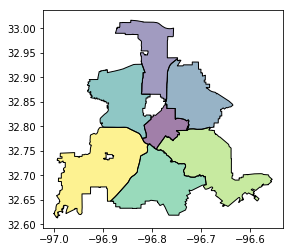

In [7]:
out.plot()

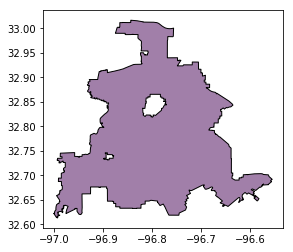

In [8]:
x = out.geometry.unary_union
x = x.buffer(e)
out = gpd.GeoDataFrame()
out["name"] = ["all"]
out.geometry = [x]
out.plot()

In [59]:
datadir = os.path.join("/media", "disk", "Data", "Dallas_Regions")
out.to_file(os.path.join(datadir, "all.geojson"), driver="GeoJSON")

In [63]:
for name, g in zip(frame.division, geo):
    out = gpd.GeoDataFrame()
    out["name"] = [name]
    out.geometry = [g]
    out.to_file(os.path.join(datadir, name+".geojson"), driver="GeoJSON")